# Explore imagecaption data

## show some example

In [3]:
import os
import sys
import json
from IPython.display import Image, display
import random
import jieba

In [4]:
data_path="/media/diskb/x39_share/ImageCaption/data/"

In [5]:
# training set
trainset_path = os.path.join(data_path, "ai_challenger_caption_train_20170902")
train_image_path = os.path.join(trainset_path, "caption_train_images_20170902")
train_annotation_path = os.path.join(trainset_path, "caption_train_annotations_20170902.json")

In [6]:
input = open(train_annotation_path,'r')
train_examples = json.load(input)
input.close()

In [7]:
train_size = len(train_examples)

In [8]:
def show_example(example):
    image_id = example['image_id']
    caption = example['caption']
    im = Image(filename=os.path.join(train_image_path, image_id)) 
    display(im)
    for c in caption:
        print type(c)
        c = c.strip().strip("。").replace('\n', '')
        seg_list = jieba.cut(c, cut_all=False)
        print ' '.join(seg_list)
    #return image_id, caption

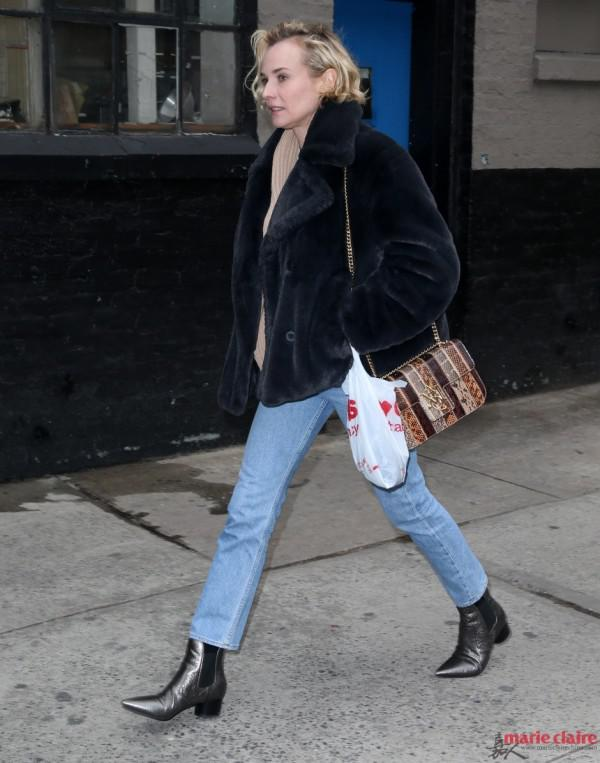

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache


<type 'unicode'>


Dumping model to file cache /tmp/jieba.cache
Dump cache file failed.
Traceback (most recent call last):
  File "/home/limiao/anaconda2/lib/python2.7/site-packages/jieba/__init__.py", line 152, in initialize
    _replace_file(fpath, cache_file)
OSError: [Errno 1] Operation not permitted
Loading model cost 2.193 seconds.
Prefix dict has been built succesfully.


道路 上 走 着 一个 穿着 牛仔裤 左手 插 兜 的 女人
<type 'unicode'>
一个 左手 插 兜 的 女人 走 在 房屋 前 的 道路 上
<type 'unicode'>
一个 背着 单肩 包 的 女人 行走 在 道路 上
<type 'unicode'>
一个 左手 插 兜 的 女人 走 在 平坦 的 道路 上
<type 'unicode'>
一个 左肩 挎着 包 的 女人 走 在 房屋 外


In [9]:
index = int(random.random() * train_size)
show_example(train_examples[index])

## lexicon

In [21]:
all_seg_sents = []
for i in range(train_size):
    if i % 10000 == 0:
        print i
    for c in train_examples[i]['caption']:
        sent = []
        c = c.strip().strip(u"。").replace('\n', '')
        for word in jieba.cut(c, cut_all=False):
            sent.append(word)
        all_seg_sents.append(sent)


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000


In [22]:
print len(all_seg_sents)

1050000


In [23]:
lexicon = {}
for sent in all_seg_sents:
    for word in sent:
        if word in lexicon:
            lexicon[word] += 1
        else:
            lexicon[word] = 1
print 'token number: %d' %(len(lexicon))

token number: 17623


In [24]:
print len(lexicon)

17623


In [25]:
rare_words_num = 0
for word,count in lexicon.items():
    if count < 5:
        rare_words_num += 1
print rare_words_num

9861


In [26]:
sorted_lexicon = sorted(lexicon.items(), key=lambda x:x[1], reverse=True)

In [27]:
for i in range(300):
    print sorted_lexicon[i][0], sorted_lexicon[i][1]

的 1729421
一个 986863
在 862029
上 582126
男人 554635
着 519013
穿着 440257
有 414515
女人 411376
两个 271990
人 234585
拿 228713
站 208127
里 176569
球场上 142295
右手 138792
戴着 137918
走 128076
双手 127096
道路 110284
球衣 99465
左手 98976
运动场 93374
和 90563
舞台 88566
坐在 78459
三个 73696
运动服 67667
旁边 65471
踢足球 60754
前面 60060
足球 55712
房间 55272
旁 54741
上衣 54523
一位 53730
帽子 52544
包 52019
运动员 51006
话筒 48380
室内 45940
大厅 44954
室外 44851
前 43431
草地 42104
黑色 41453
衣服 38969
屋子里 34772
一群 34185
东西 34184
足球场 33292
裙子 32926
眼镜 32016
身穿 31175
争抢 30670
白色 30510
放在 30060
男士 29872
抢 29651
孩子 28806
墨镜 28487
平坦 28446
球服 28207
抱 27433
打篮球 26717
宽敞 26157
街道 25516
打 24240
四个 24086
表演 23870
抬起 23815
小孩 23489
面带微笑 23163
深色 22959
房屋 22949
女士 22646
坐 22071
唱歌 21619
人旁 21381
插 20890
不同 20870
女孩 20412
搂 20301
短袖 20135
绿茵茵 20135
桌子 20097
蹲 19807
干净 19711
背着 19253
交谈 19252
给 19226
手里 18520
椅子 18096
说话 17890
房屋里 17882
手机 17712
旁有 17662
头发 17551
碧绿 17474
裤子 17295
西装 17129
衣着 17070
外套 16442
短裤 16228
广告牌 16213
看着 15963
拎 15877
高尔夫球 15733
红色 15693
绿油油 15

In [17]:
print train_examples[0]

{u'url': u'http://m4.biz.itc.cn/pic/new/n/71/65/Img8296571_n.jpg', u'image_id': u'8f00f3d0f1008e085ab660e70dffced16a8259f6.jpg', u'caption': [u'\u4e24\u4e2a\u8863\u7740\u4f11\u95f2\u7684\u4eba\u5728\u5e73\u6574\u7684\u9053\u8def\u4e0a\u4ea4\u8c08', u'\u4e00\u4e2a\u7a7f\u7740\u7ea2\u8272\u4e0a\u8863\u7684\u7537\u4eba\u548c\u4e00\u4e2a\u7a7f\u7740\u7070\u8272\u88e4\u5b50\u7684\u7537\u4eba\u7ad9\u5728\u5ba4\u5916\u7684\u9053\u8def\u4e0a\u4ea4\u8c08', u'\u5ba4\u5916\u7684\u516c\u56ed\u91cc\u6709\u4e24\u4e2a\u7a7f\u7740\u957f\u88e4\u7684\u7537\u4eba\u5728\u4ea4\u6d41', u'\u8857\u9053\u4e0a\u6709\u4e00\u4e2a\u7a7f\u7740\u6df1\u8272\u5916\u5957\u7684\u7537\u4eba\u548c\u4e00\u4e2a\u7a7f\u7740\u7ea2\u8272\u5916\u5957\u7684\u7537\u4eba\u5728\u4ea4\u8c08', u'\u9053\u8def\u4e0a\u6709\u4e00\u4e2a\u8eab\u7a7f\u7ea2\u8272\u4e0a\u8863\u7684\u7537\u4eba\u5728\u548c\u4e00\u4e2a\u62ac\u7740\u5de6\u624b\u7684\u4eba\u8bb2\u8bdd']}


In [28]:
import codecs
output = codecs.open('all_seg_sents.txt' ,'w', 'utf-8')
for sent in all_seg_sents:
    output.write("%s\n" %(" ".join(sent)))
output.close()


In [30]:
max_len = len(all_seg_sents[0])
min_len = max_len
max_sent = None
min_sent = None
for sent in all_seg_sents:
    if len(sent) > max_len:
        max_len = len(sent)
        max_sent = sent
    if len(sent) < min_len:
        min_len = len(sent)
        min_sent = sent
        
print max_len, min_len
print " ".join(max_sent)
print " ".join(min_sent)

32 5
一个 左手 拿 着 鞋子 的 男人 前面 有 一个 右手 插 在 裤子 口袋 里 的 男人 和 一个 右手 拿 着 帽子 的 男人 走 在 室外 的 台阶 上
一个 男人 在 图书馆 看书
